In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 각 줄에 대한 설명은 다음과 같습니다:

# import torch: PyTorch 라이브러리를 가져옵니다. 이를 통해 PyTorch의 모듈과 함수를 사용할 수 있습니다.

# from torch.utils.data import Dataset: PyTorch의 데이터셋 클래스인 Dataset을 가져옵니다. 이 클래스는 커스텀 데이터셋을 만들거나 기존의 데이터셋을 사용할 때 유용합니다.

# from torchvision import datasets: torchvision은 PyTorch에서 컴퓨터 비전 작업을 위한 여러 유명한 데이터셋을 제공하는 패키지입니다. datasets 모듈에서 데이터셋을 가져올 수 있습니다.

# from torchvision.transforms import ToTensor: torchvision의 transforms 모듈에서 ToTensor 변환을 가져옵니다. 이 변환은 PIL 이미지나 NumPy 배열을 PyTorch 텐서로 변환하는 역할을 합니다.

# import matplotlib.pyplot as plt: Matplotlib 라이브러리를 가져옵니다. Matplotlib은 데이터 시각화를 위해 사용되는 파이썬 패키지로, plt라는 별칭으로 사용됩니다.

# 이러한 줄들은 PyTorch와 torchvision을 사용하여 데이터를 다루고 시각화하기 위해 필요한 모듈과 함수를 가져오는 것입니다. 이후 코드에서 이러한 모듈과 함수를 사용하여 데이터셋을 로드하고 변환하여 사용할 수 있습니다.



In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# root 는 학습/테스트 데이터가 저장되는 경로입니다.

# train 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.

# download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드합니다.

# transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다. 데이터셋에 적용할 변환을 지정합니다. ToTensor()는 PIL 이미지를 PyTorch 텐서로 변환하는 변환입니다.

test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15934288.21it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 275861.12it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5065751.19it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16247010.53it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



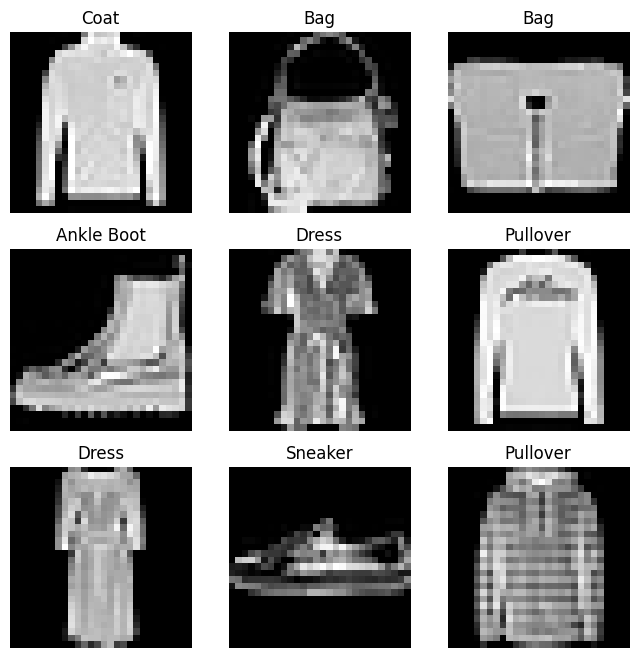

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# "플롯(plot)"은 데이터 시각화를 위해 사용되는 용어입니다. 플롯은 그래프나 차트 형태로 데이터를 시각적으로 표현하는 작업을 말합니다.

# Matplotlib 라이브러리를 사용하여 플롯을 생성할 수 있습니다. 플롯은 데이터의 분포, 패턴, 관계 등을 시각적으로 이해할 수 있도록 도와줍니다.


# 주어진 코드는 FashionMNIST 훈련 데이터셋에서 무작위 샘플 이미지를 선택하여 시각화하는 코드입니다. 각 이미지는 해당하는 레이블에 따라 제목이 표시됩니다.

# 이 코드를 실행하면 3x3 크기의 서브플롯이 생성되며, 각 서브플롯에는 무작위로 선택된 이미지와 해당하는 레이블이 표시됩니다.

# labels_map은 레이블 값을 의미에 맞게 문자열로 매핑한 딕셔너리입니다. 이를 사용하여 레이블 값을 의류의 이름으로 변환합니다.

# figure는 전체 그림(플롯)을 나타내는 객체를 생성합니다. plt.figure(figsize=(8, 8))는 크기가 8x8인 플롯을 생성합니다.

# cols와 rows는 서브플롯의 열과 행 개수를 지정합니다. 현재 코드에서는 3x3 플롯을 생성하도록 설정되어 있습니다.

# for 루프를 통해 1부터 cols * rows까지 반복하면서 각각의 서브플롯을 생성하고 데이터를 시각화합니다. sample_idx는 0부터 training_data의 길이 사이에서 무작위로 선택된 샘플의 인덱스입니다.

# img와 label은 선택된 샘플의 이미지와 레이블을 가져옵니다. figure.add_subplot()은 서브플롯을 추가하고, plt.title()은 서브플롯에 레이블 이름을 제목으로 표시합니다. plt.axis("off")는 축을 숨기고, plt.imshow()는 이미지를 흑백으로 표시합니다.

# figure.add_subplot(rows, cols, i)에서 i는 서브플롯의 위치를 지정하는 인덱스입니다. add_subplot 함수는 그림(플롯) 객체인 figure에 서브플롯을 추가하는 역할을 합니다.

# 서브플롯은 그림을 여러 개의 작은 영역으로 나눈 것을 말합니다. add_subplot 함수의 인자로 전달되는 rows, cols, i는 서브플롯의 위치를 결정합니다.

# rows: 플롯에서 서브플롯의 행 수를 나타냅니다.
# cols: 플롯에서 서브플롯의 열 수를 나타냅니다.
# i: 서브플롯의 인덱스를 나타냅니다. 인덱스는 좌측 상단부터 시작하여 왼쪽에서 오른쪽으로 증가하고, 행이 바뀔 때마다 다음 행으로 넘어갑니다.
# 예를 들어, rows=3, cols=3로 설정되어 있고 i=1인 경우, 첫 번째 행, 첫 번째 열의 서브플롯을 의미합니다. i=2인 경우에는 첫 번째 행, 두 번째 열의 서브플롯을 의미하며, i=4인 경우에는 두 번째 행, 첫 번째 열의 서브플롯을 의미합니다.

# 따라서 figure.add_subplot(rows, cols, i)를 통해 i 값을 조정함으로써 원하는 위치에 서브플롯을 추가할 수 있습니다.

# 마지막으로 plt.show()를 호출하여 그림을 표시합니다.

# 이 코드를 실행하면 FashionMNIST 훈련 데이터셋에서 무작위로 선택된 의류 이미지 9개가 시각화되어 출력됩니다.

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

# self는 파이썬 클래스에서 현재 인스턴스를 가리키는 특수한 키워드입니다. 클래스 내에서 self를 사용하여 인스턴스 변수에 접근하고 해당 인스턴스의 메서드를 호출할 수 있습니다.

# self는 인스턴스 자체를 참조하는 매개변수로서, 클래스의 메서드에서 첫 번째 매개변수로 정의됩니다. 일반적으로 이 매개변수의 이름은 self로 지정되지만, 실제로는 이름이 중요한 것이 아니라 첫 번째 매개변수로 인스턴스를 참조할 수 있도록 지정하는 것이 중요합니다.

# 예를 들어, CustomImageDataset 클래스에서 self.img_labels는 해당 인스턴스의 img_labels 인스턴스 변수에 접근하는 것을 의미합니다. self.transform은 인스턴스의 transform 인스턴스 변수에 접근하는 것을 의미합니다.

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

#__len__ 함수는 데이터셋의 샘플 개수를 반환합니다.

    def __len__(self):
        return len(self.img_labels)

# transform은 입력 데이터에 대한 변환 함수이고, target_transform은 타깃 데이터(레이블)에 대한 변환 함수입니다.

# transform은 입력 데이터를 전처리하고 변환하는 데 사용되며, target_transform은 타깃 데이터의 형식을 조정하거나 변환하는 데 사용

# __getitem__ 함수는 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.

# 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, read_image 를 사용하여 이미지를 텐서로 변환하고, self.img_labels 의 csv 데이터로부터 해당하는 정답(label)을 가져오고,
#  (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# 주어진 코드는 커스텀 이미지 데이터셋인 CustomImageDataset을 정의하는 코드입니다. 이 데이터셋은 주어진 어노테이션 파일과 이미지 디렉토리에서 이미지와 레이블을 로드합니다.

# 코드의 각 줄에 대한 설명은 다음과 같습니다:

# import os: os 모듈을 가져옵니다. 파일 경로 조작과 관련된 함수를 사용할 수 있게 해줍니다.

# import pandas as pd: pandas 라이브러리를 가져옵니다. 데이터 분석 및 조작을 위한 편리한 기능을 제공합니다.

# from torchvision.io import read_image: torchvision의 read_image 함수를 가져옵니다. 이 함수는 이미지 파일을 읽고 PyTorch 텐서로 변환하는 역할을 합니다.

# class CustomImageDataset(Dataset):: Dataset 클래스를 상속받아 CustomImageDataset 클래스를 정의합니다. 이 클래스는 PyTorch의 데이터셋 클래스를 확장하여 커스텀 이미지 데이터셋을 생성합니다.

# def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):: 클래스의 초기화 메서드를 정의합니다. 어노테이션 파일, 이미지 디렉토리, 변환 함수를 인자로 받습니다. transform과 target_transform은 이미지와 레이블에 적용할 변환 함수입니다.

# self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label']): 주어진 어노테이션 파일을 pandas를 사용하여 읽고, 파일 이름과 레이블을 포함하는 데이터프레임으로 저장합니다.

# self.img_dir = img_dir: 이미지 디렉토리 경로를 인스턴스 변수에 저장합니다.

# self.transform = transform: 이미지 변환 함수를 인스턴스 변수에 저장합니다.

# self.target_transform = target_transform: 레이블 변환 함수를 인스턴스 변수에 저장합니다.

# def __len__(self):: 데이터셋의 샘플 수를 반환하는 __len__ 메서드를 정의합니다.

# def __getitem__(self, idx):: 주어진 인덱스 idx에 해당하는 샘플을 반환하는 __getitem__ 메서드를 정의합니다.

# img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]): 이미지 경로를 구성하기 위해 이미지 디렉토리 경로와 파일 이름을 결합합니다.

# image = read_image(img_path): read_image 함수를 사용하여 이미지 파일을 읽고 PyTorch 텐서로 변환합니다.

# label = self.img_labels.iloc[idx, 1]: 해당 인덱스의 샘플에 대한 레이블을 가져옵니다.

# if self.transform:: transform이 존재하는 경우 이미지에 변환 함수를 적용합니다.

# if self.target_transform:: target_transform이 존재하는 경우 레이블에 변환 함수를 적용합니다.

# return image, label: 변환된 이미지와 레이블을 반환합니다.

# 이렇게 정의된 CustomImageDataset 클래스를 사용하여 데이터셋을 생성하고, 학습에 활용할 수 있습니다.

Original shape: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


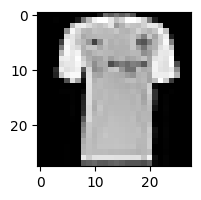

Label : 0


In [13]:
# Dataset 은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다.

# 모델을 학습할 때, 일반적으로 샘플들을 《미니배치(minibatch)》로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

#미니배치(Mini-batch): 미니배치는 데이터셋을 작은 일부 그룹으로 나눈 것을 말합니다.
#학습 데이터가 많을 경우에는 전체 데이터를 한 번에 처리하기 어렵기 때문에, 미니배치라는 작은 그룹으로 나누어서 학습을 수행합니다. 예를 들어, 1000개의 학습 데이터가 있다면 이를 100개의 미니배치로 나눌 수 있습니다.

# 에폭(Epoch): 에폭은 전체 학습 데이터셋이 모델에 대해 한 번 통과하는 것을 의미합니다.
# 예를 들어, 1000개의 학습 데이터가 있고 배치 크기를 100으로 설정하면, 1 에폭은 모델이 1000개의 데이터를 10번(1000/100) 학습하는 것을 의미합니다.
# 에폭은 학습 과정에서 전체 데이터를 몇 번 반복하여 학습할지 결정하는 하이퍼파라미터입니다.

# DataLoader 는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iterable)입니다.

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)

# DataLoader 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다.

# 아래의 각 순회(iteration)는 (각각 batch_size=64 의 특징(feature)과 정답(label)을 포함하는) train_features 와 train_labels 의 묶음(batch)을 반환합니다.

# shuffle=True 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다. (데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 Samplers 를 살펴보세요.)

train_features, train_labels=next(iter(train_dataloader))

# train_dataloader에서 next(iter(...))를 사용하여 첫 번째 미니배치를 가져옵니다.
#  train_features는 해당 미니배치의 입력 데이터를, train_labels는 해당 미니배치의 레이블을 나타냅니다.

print(f"Original shape: {training_data}")
#train_features의 크기(shape)를 출력합니다. 이는 해당 미니배치의 입력 데이터의 차원을 보여줍니다.

print(f"Feature batch shape: {train_features.size()}")
#train_features의 크기(shape)를 출력합니다. 이는 해당 미니배치의 입력 데이터의 차원을 보여줍니다.

print(f"Labels batch shape: {train_labels.size()}")
#train_labels의 크기(shape)를 출력합니다. 이는 해당 미니배치의 레이블의 차원을 보여줍니다.

figure = plt.figure(figsize=(2, 2))
img = train_features[0].squeeze()
#첫 번째 샘플의 이미지를 가져와서 squeeze() 함수를 사용하여 차원을 축소합니다. squeeze() 함수는 크기가 1인 차원을 제거하여 이미지를 2D 형태로 만듭니다.

label=train_labels[0]
#첫 번째 샘플의 레이블을 가져옵니다.

plt.imshow(img, cmap='gray')
#imshow() 함수를 사용하여 이미지를 흑백으로 시각화합니다.

plt.show()
#이미지를 화면에 출력합니다.

print(f"Label : {label}")
#해당 샘플의 레이블을 출력합니다.